In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/AllBulk.xlsx'
df = pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 10180479.711597284
R-squared: 0.865386272609939
Overall MAPE: 12.904061263644614%
Overall MAE: 1692.0785084786983


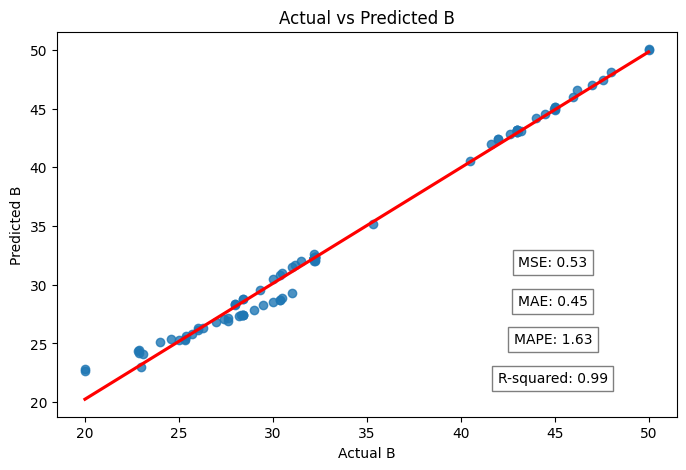

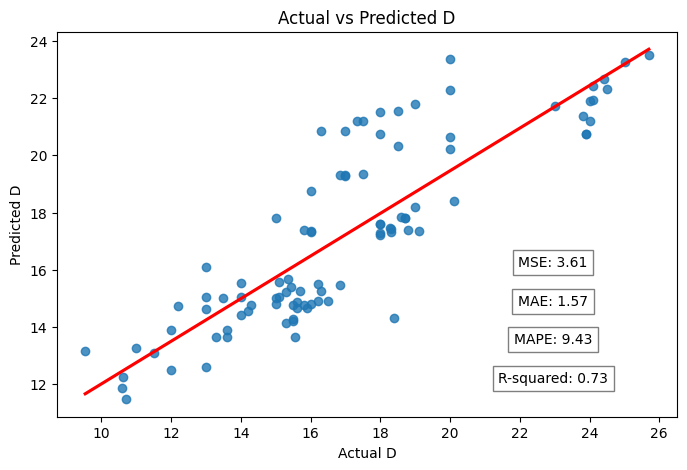

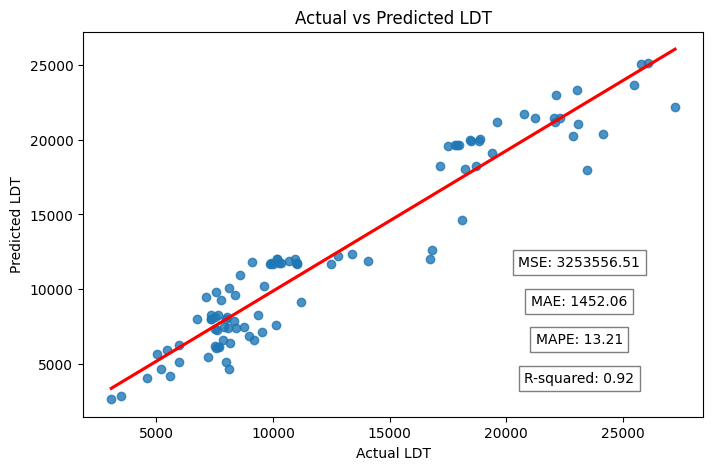

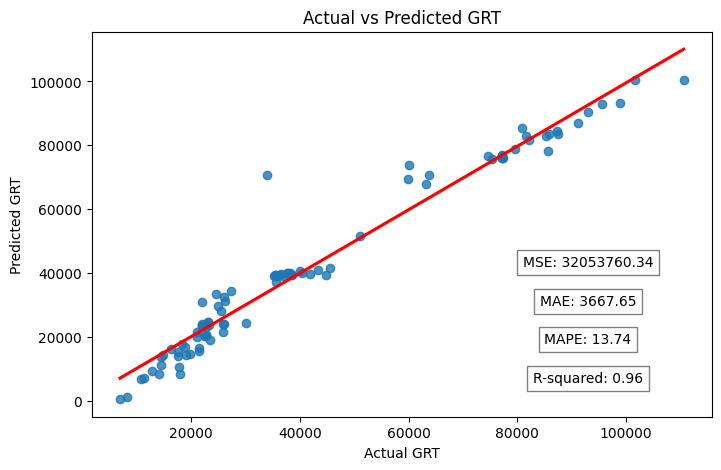

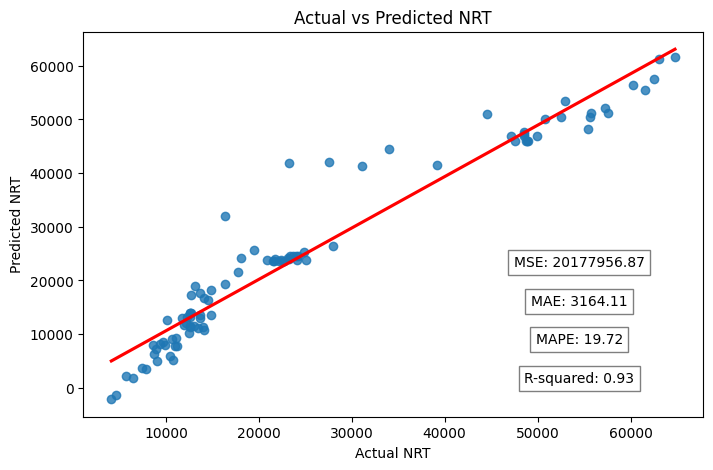

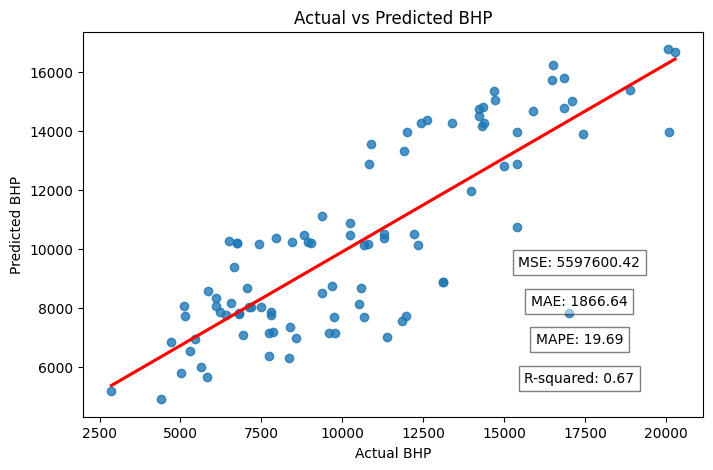

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
# Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 5893389.6632240405
R-squared: 0.8795598369851868
Overall MAPE: 9.25041639779168%
Overall MAE: 1215.7504969651116


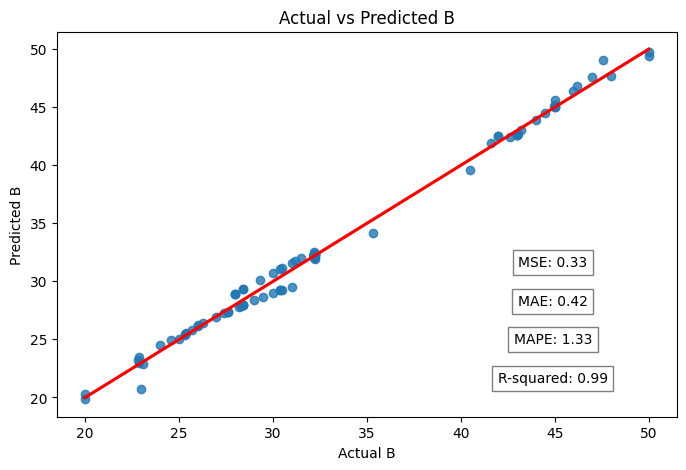

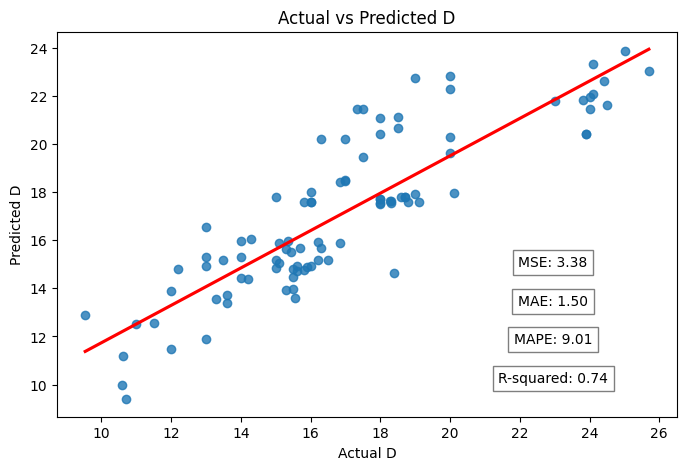

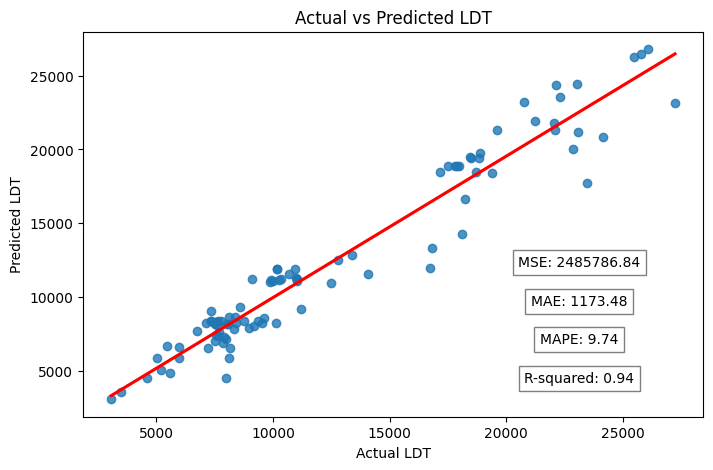

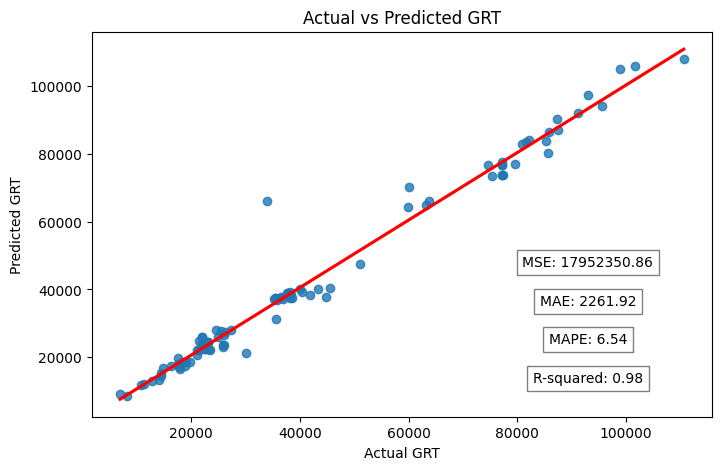

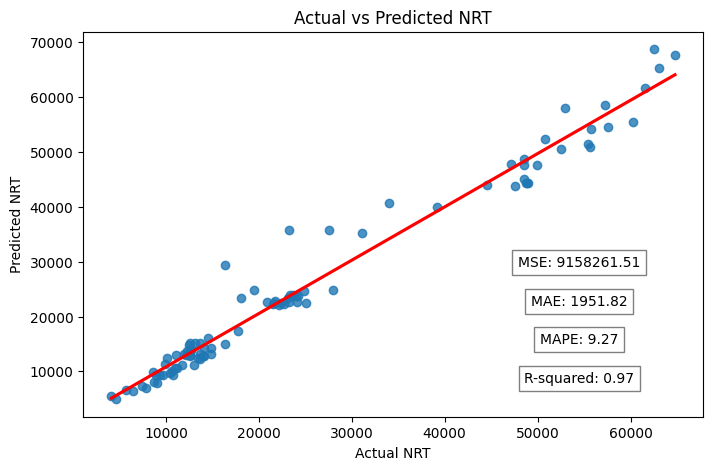

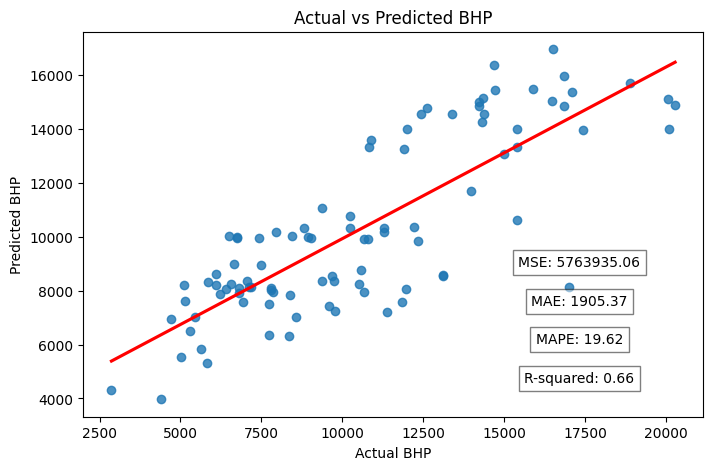

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting features and target
X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')

    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 6691135.024775539
R-squared: 0.8338755151699772
Overall MAPE: 8.788234937631989%
Overall MAE: 1100.325315602837


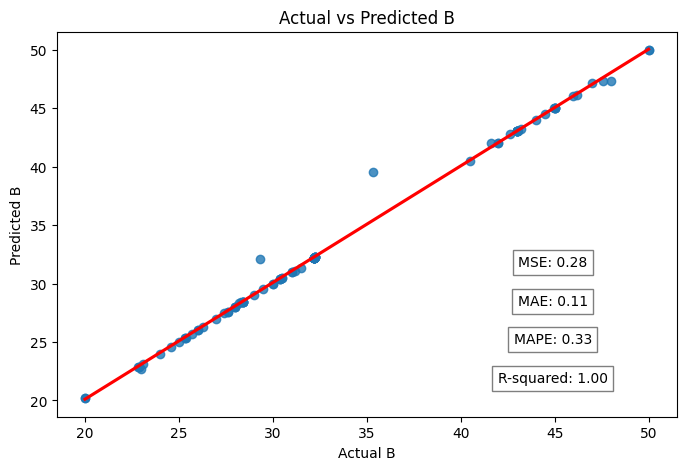

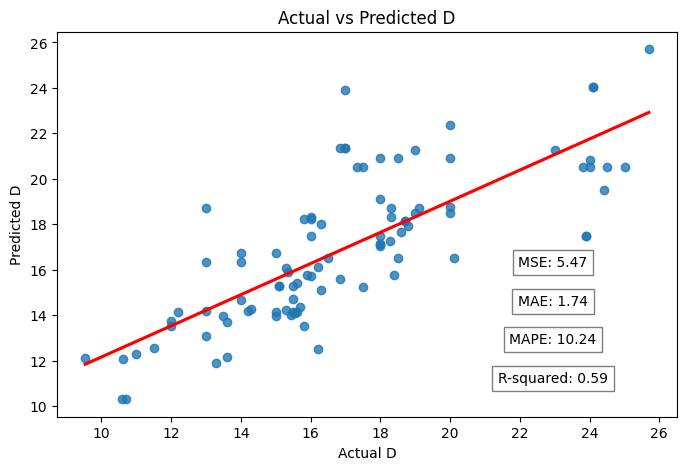

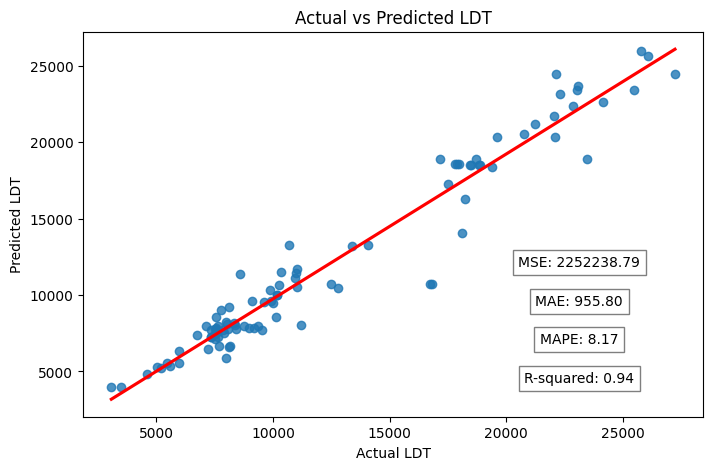

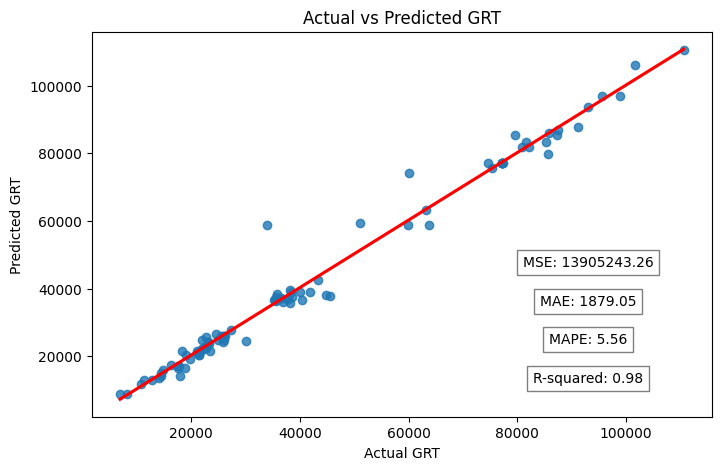

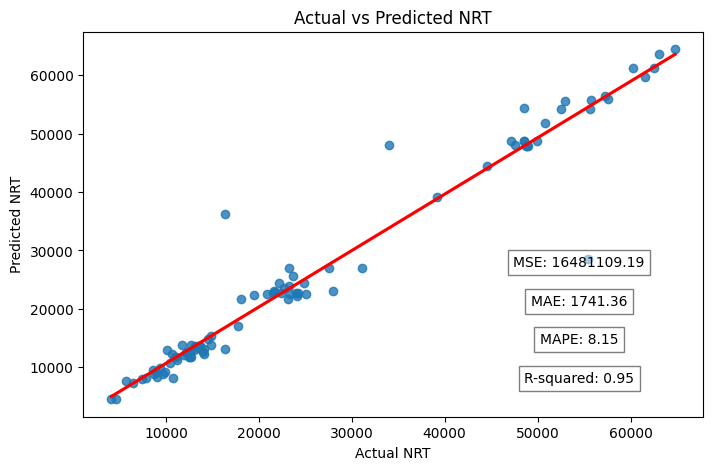

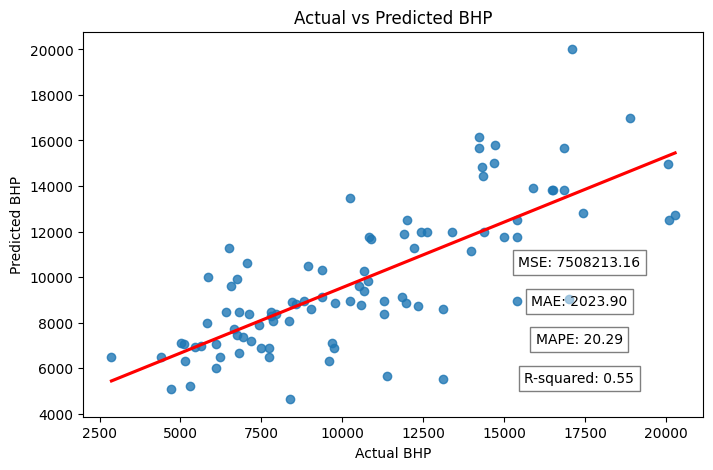

In [44]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor model
model = KNeighborsRegressor(n_neighbors=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 5242826.375976321
R-squared: 0.8114761480792364
Overall MAPE: 8.919856329039625%
Overall MAE: 949.9976020770013


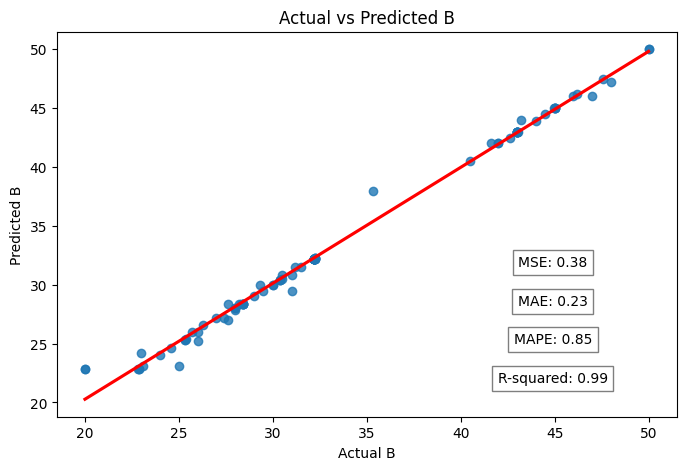

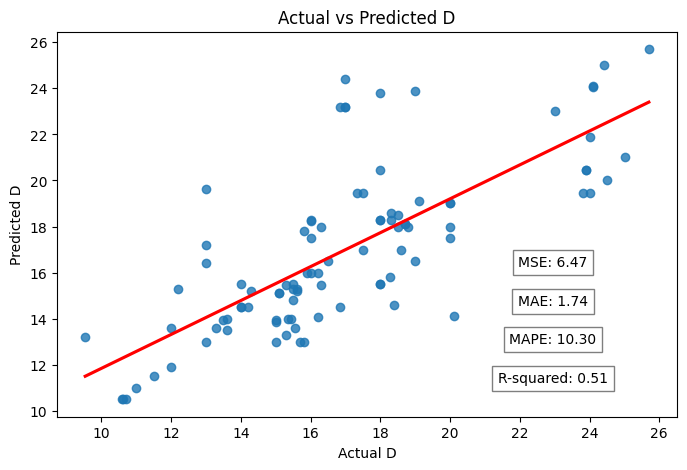

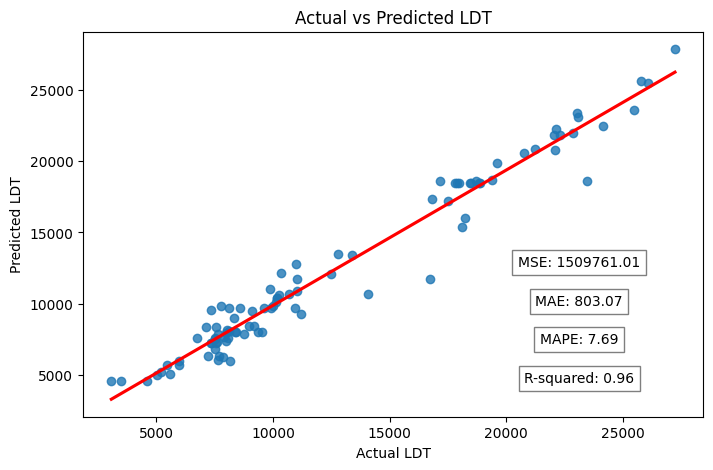

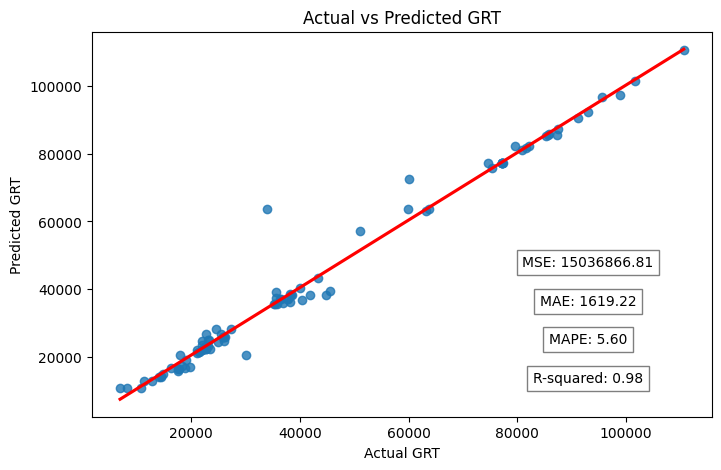

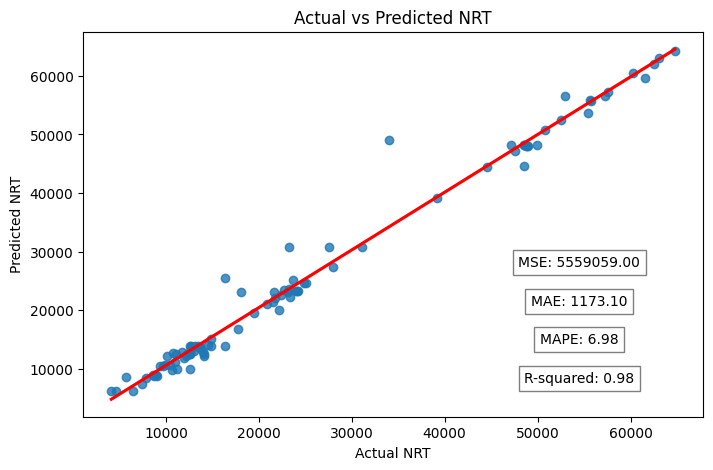

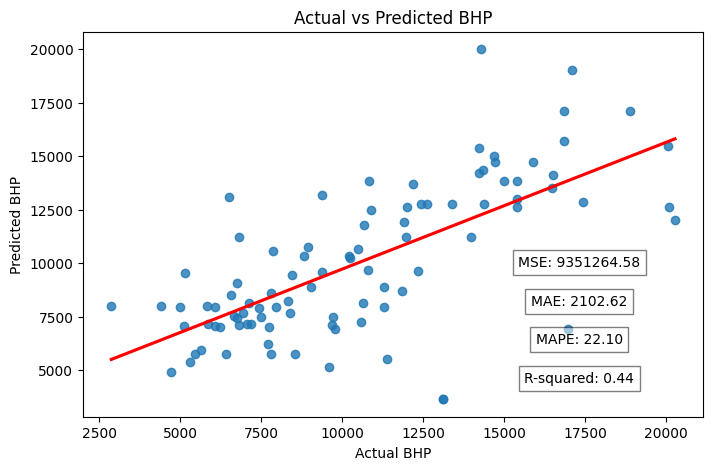

In [48]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 4035875.9891031175
R-squared: 0.8638258914479348
Overall MAPE: 8.003102841487271%
Overall MAE: 901.4487037903168


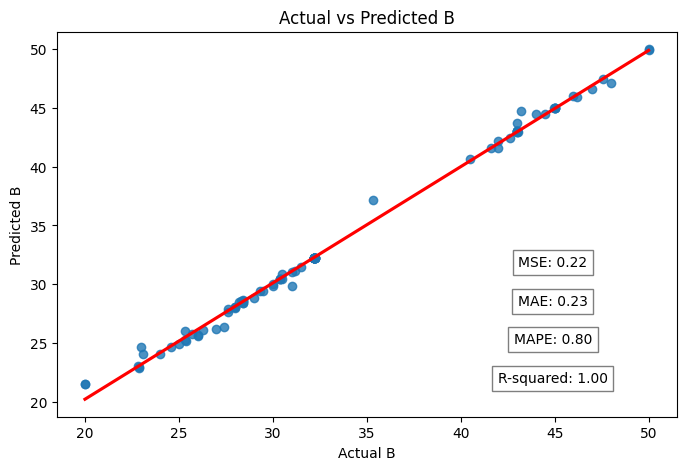

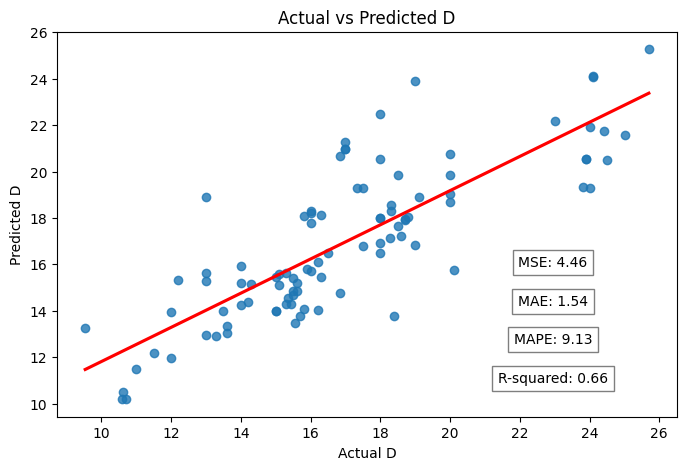

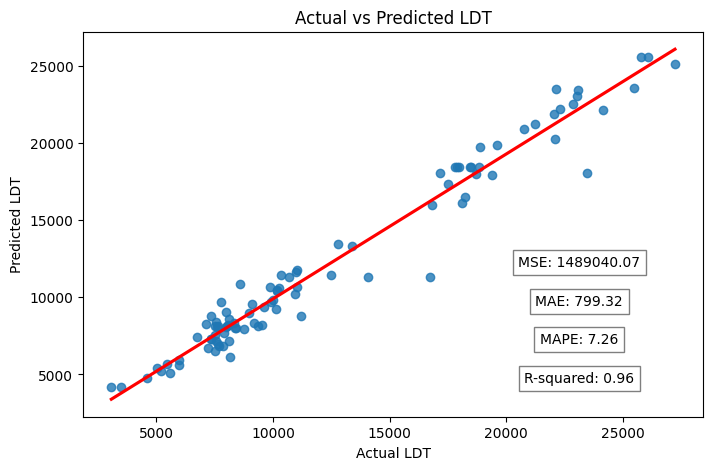

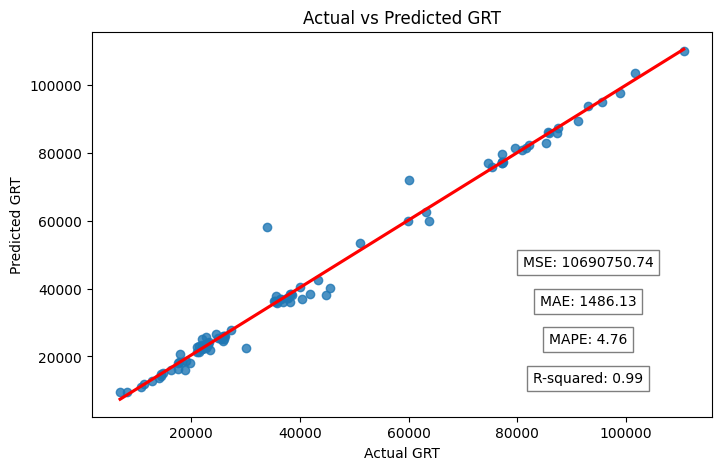

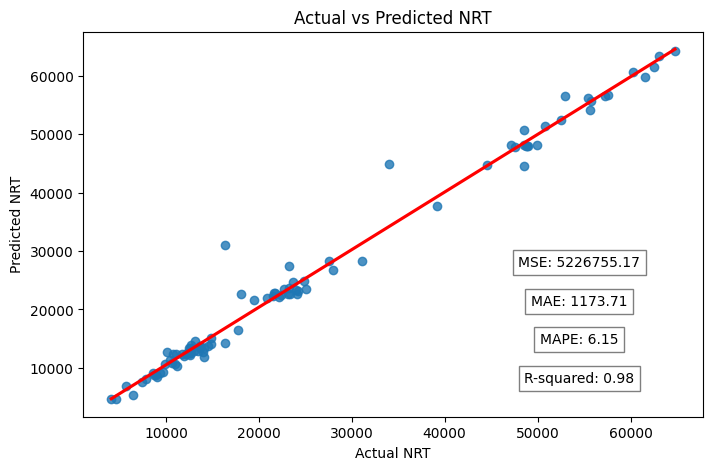

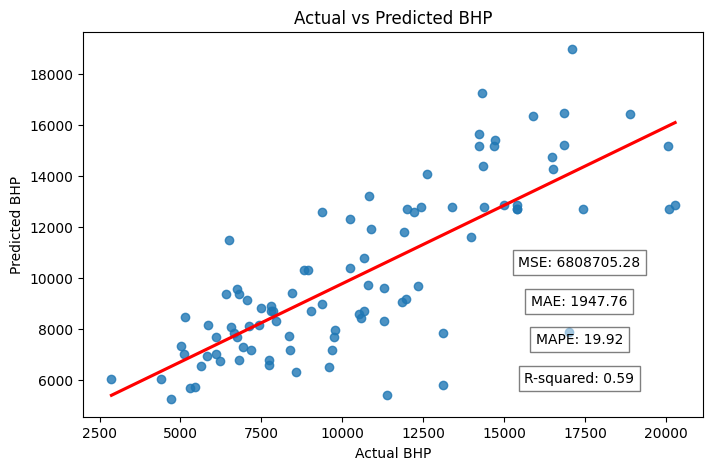

In [49]:
from sklearn.ensemble import RandomForestRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 10180424.344583642
R-squared: 0.8648895608170766
Overall MAPE: 12.915215765416804%
Overall MAE: 1692.0795941477602


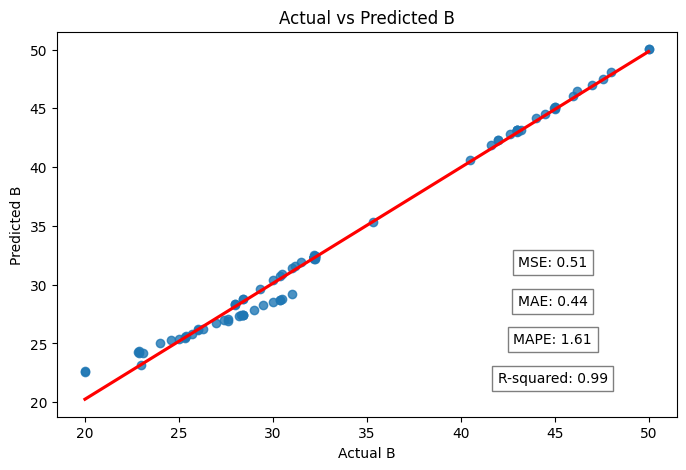

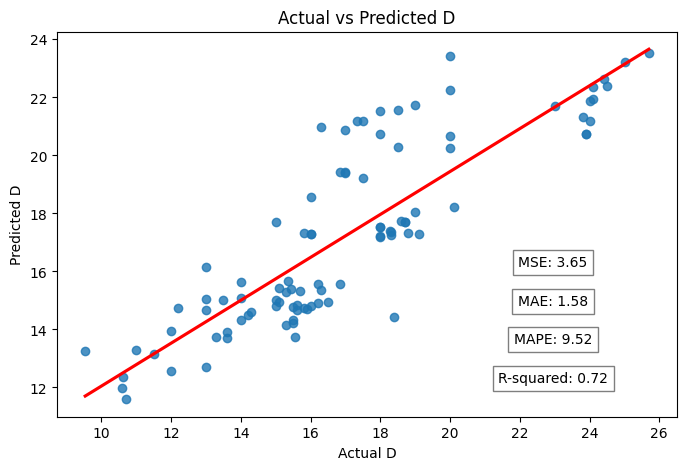

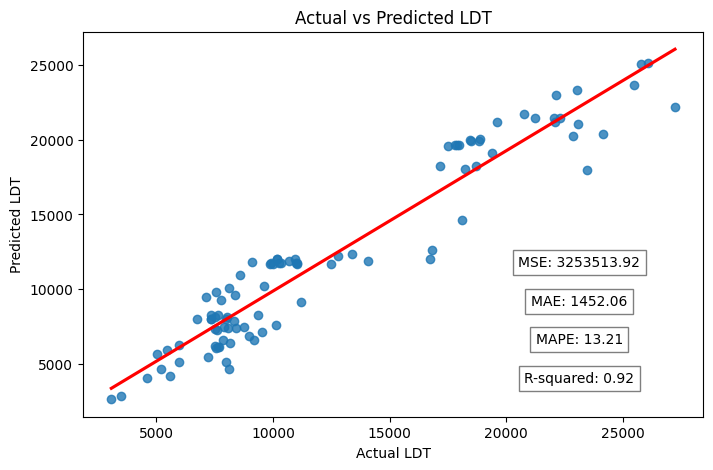

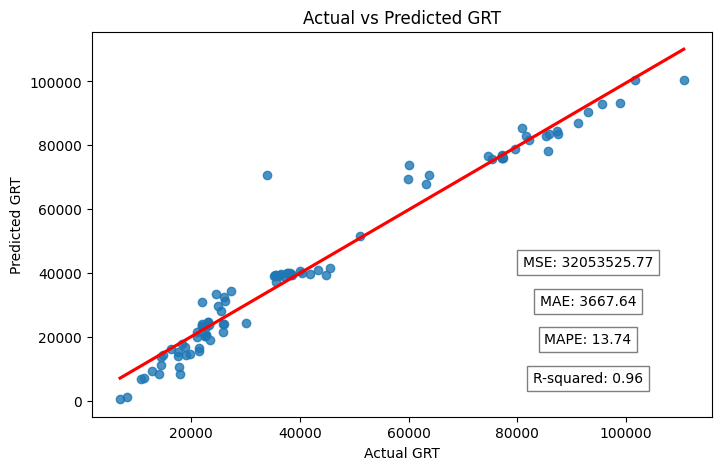

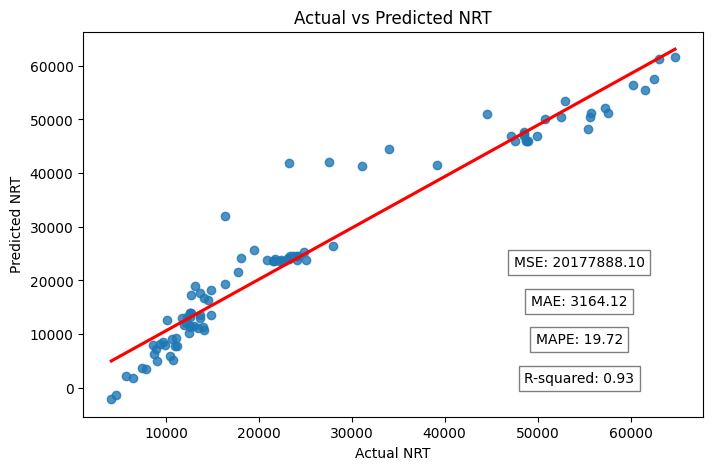

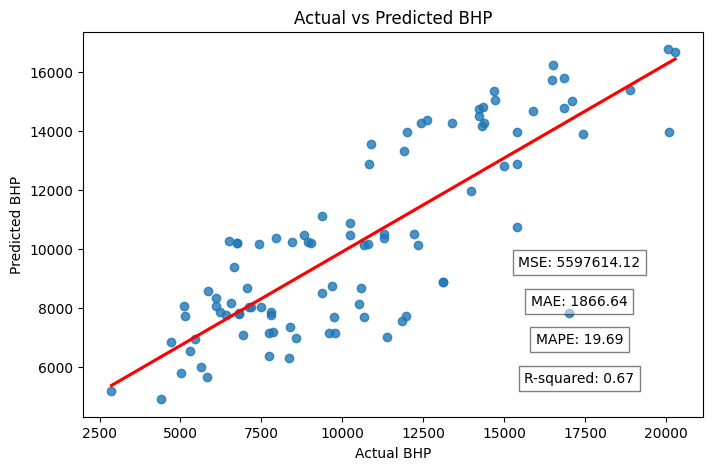

In [50]:
from sklearn.linear_model import Lasso

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regressor model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 10180492.449260004
R-squared: 0.8653861802406934
Overall MAPE: 12.904058085678614%
Overall MAE: 1692.0783822084156


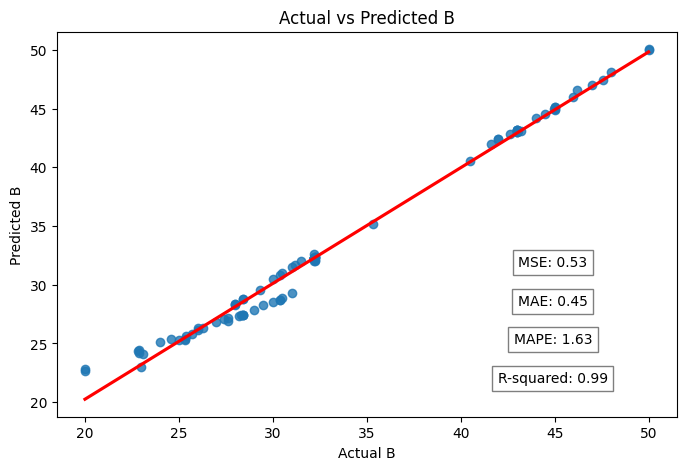

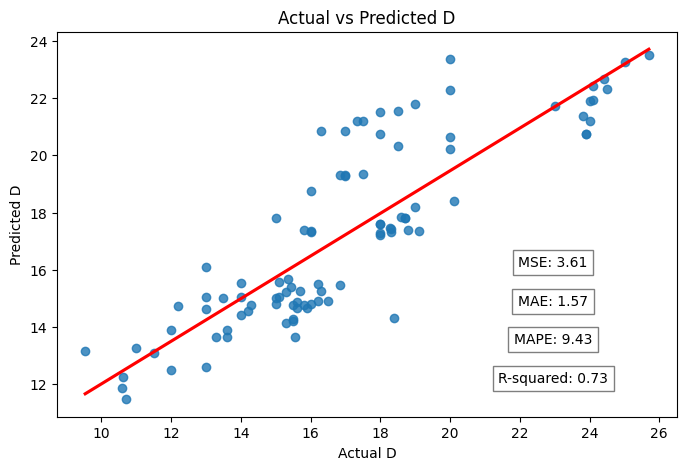

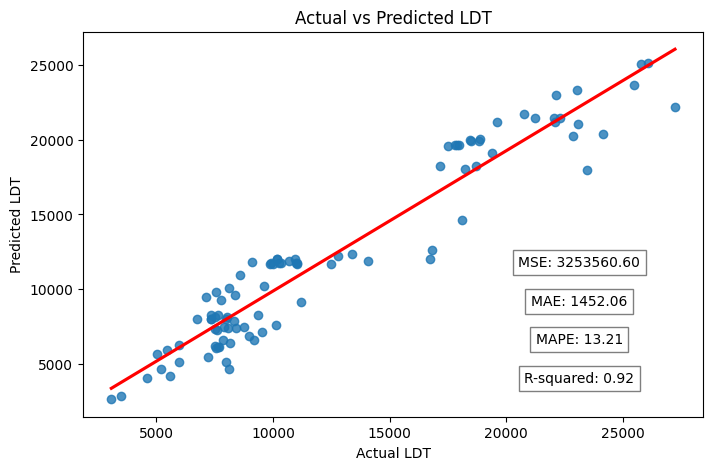

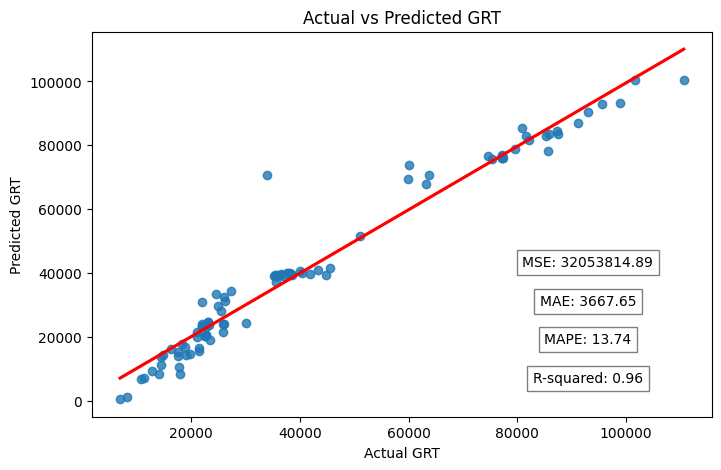

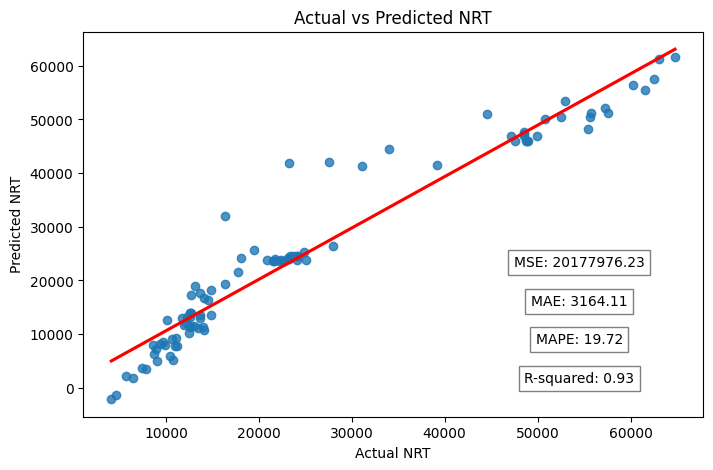

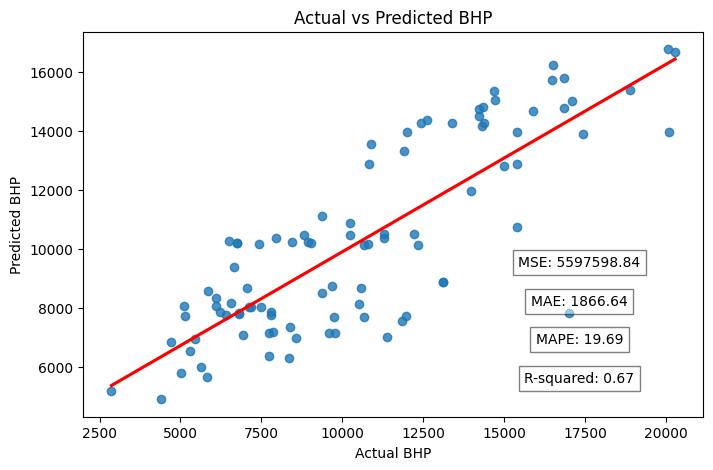

In [51]:
from sklearn.linear_model import Ridge

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regressor model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [54]:
from sklearn.svm import SVR

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressor model
model = SVR()

# Initialize lists to store predictions and true values for each column
y_pred_list = []
y_true_list = []

# Train and predict for each column separately
for col in y.columns:
    # Train the model
    model.fit(X_train, y_train[col])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Append predictions and true values to the lists
    y_pred_list.append(y_pred)
    y_true_list.append(y_test[col])

# Convert lists to arrays
y_pred_array = np.array(y_pred_list).T
y_true_array = np.array(y_true_list).T

# Evaluate the model
mse = mean_squared_error(y_true_array, y_pred_array)
r2 = r2_score(y_true_array, y_pred_array)
mape = np.mean(np.abs((y_true_array - y_pred_array) / y_true_array)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_true_array, y_pred_array)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

Mean Squared Error: 201118741.18797895
R-squared: 0.18872237364426261
Overall MAPE: 34.077172471792736%
Overall MAE: 7204.710962846465


In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize the AdaBoost regressor model
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 0.604443266382118
R-squared (B): 0.9900363488069386
MAPE (B): 1.8746050132657213%
MAE (B): 0.5590407709118496
--------------------------------------------------
Mean Squared Error (D): 4.026527534633378
R-squared (D): 0.6951041497701463
MAPE (D): 9.986292301790787%
MAE (D): 1.683514586309964
--------------------------------------------------
Mean Squared Error (LDT): 3798312.6456859573
R-squared (LDT): 0.903339994080553
MAPE (LDT): 15.259316728711509%
MAE (LDT): 1449.973847632285
--------------------------------------------------
Mean Squared Error (GRT): 47637772.08779126
R-squared (GRT): 0.9354786643736996
MAPE (GRT): 19.522972002240973%
MAE (GRT): 5433.483119592549
--------------------------------------------------
Mean Squared Error (NRT): 17615528.61620767
R-squared (NRT): 0.9427437225266968
MAPE (NRT): 19.773862453733702%
MAE (NRT): 3151.2770121271997
--------------------------------------------------
Mean Squared Error (BHP): 6579170.810535362
R-squared (

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regressor model
model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 0.08972535911224942
R-squared (B): 0.9985209659349543
MAPE (B): 0.4526783752620127%
MAE (B): 0.1376913715950292
--------------------------------------------------
Mean Squared Error (D): 3.6379176148947225
R-squared (D): 0.7245303863641701
MAPE (D): 8.670054487765807%
MAE (D): 1.4535170112905236
--------------------------------------------------
Mean Squared Error (LDT): 1718805.9454996597
R-squared (LDT): 0.9562595793542493
MAPE (LDT): 8.524347601162667%
MAE (LDT): 955.1128763509922
--------------------------------------------------
Mean Squared Error (GRT): 11310361.907640899
R-squared (GRT): 0.984681070824367
MAPE (GRT): 5.8426837268921155%
MAE (GRT): 1783.7217291586148
--------------------------------------------------
Mean Squared Error (NRT): 5476898.243313806
R-squared (NRT): 0.9821982744688287
MAPE (NRT): 6.961654057230174%
MAE (NRT): 1388.8349348751337
--------------------------------------------------
Mean Squared Error (BHP): 6153681.37154827
R-square

In [61]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 0.40419356822922226
R-squared (B): 0.9933372676108714
MAPE (B): 0.6657769145965127%
MAE (B): 0.1716698715534621
--------------------------------------------------
Mean Squared Error (D): 5.032754836635402
R-squared (D): 0.6189108228576725
MAPE (D): 9.476187511751109%
MAE (D): 1.6149937213329557
--------------------------------------------------
Mean Squared Error (LDT): 2305193.074180813
R-squared (LDT): 0.9413371154560276
MAPE (LDT): 8.009146191240939%
MAE (LDT): 895.7036058011968
--------------------------------------------------
Mean Squared Error (GRT): 13601945.867363494
R-squared (GRT): 0.9815773140510942
MAPE (GRT): 5.4128519367998935%
MAE (GRT): 1842.1509620179522
--------------------------------------------------
Mean Squared Error (NRT): 4123614.984089487
R-squared (NRT): 0.9865968913640851
MAPE (NRT): 7.020745429087051%
MAE (NRT): 1235.923230759641
--------------------------------------------------
Mean Squared Error (BHP): 7889075.846533802
R-squared

Epoch 1/380
10/10 [==============================] - 1s 23ms/step - loss: 592057152.0000 - mae: 14681.2373 - val_loss: 579699584.0000 - val_mae: 14518.6064
Epoch 2/380
10/10 [==============================] - 0s 7ms/step - loss: 592052864.0000 - mae: 14681.1680 - val_loss: 579695552.0000 - val_mae: 14518.5430
Epoch 3/380
10/10 [==============================] - 0s 8ms/step - loss: 592048448.0000 - mae: 14681.0977 - val_loss: 579690304.0000 - val_mae: 14518.4531
Epoch 4/380
10/10 [==============================] - 0s 8ms/step - loss: 592042496.0000 - mae: 14680.9951 - val_loss: 579683584.0000 - val_mae: 14518.3301
Epoch 5/380
10/10 [==============================] - 0s 10ms/step - loss: 592034944.0000 - mae: 14680.8516 - val_loss: 579675072.0000 - val_mae: 14518.1582
Epoch 6/380
10/10 [==============================] - 0s 8ms/step - loss: 592025280.0000 - mae: 14680.6582 - val_loss: 579663872.0000 - val_mae: 14517.9268
Epoch 7/380
10/10 [==============================] - 0s 9ms/step - l

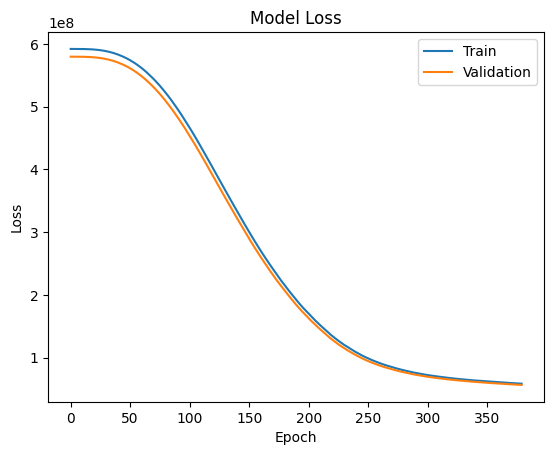

In [109]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))  # Two input features (LOA, DWT)
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Six output targets (B, D, LDT, NRT, GRT, BHP)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=380, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()